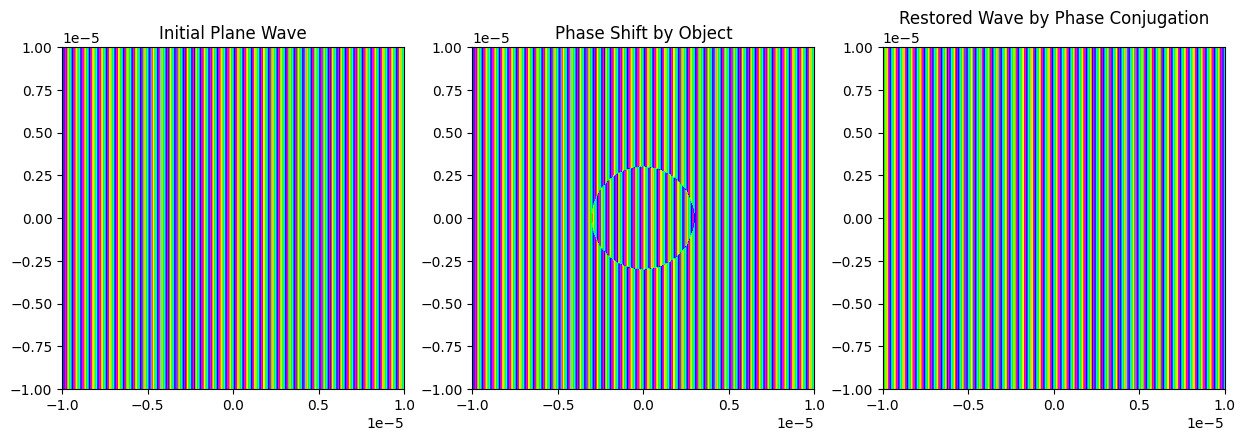

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 波のパラメータ
wavelength = 500e-9  # 500 nm (可視光)
k = 2 * np.pi / wavelength  # 波数

# 平面波の作成
x = np.linspace(-10e-6, 10e-6, 500)  # x軸 (±10マイクロメートル)
y = np.linspace(-10e-6, 10e-6, 500)  # y軸 (±10マイクロメートル)
X, Y = np.meshgrid(x, y)
initial_phase = 0  # 初期位相はなし
plane_wave = np.exp(1j * (k * X + initial_phase))  # 平面波


# 円形の物体の中心部に位相遅延を設定する
object_phase_shift = np.zeros_like(X)
radius = 3e-6  # 物体の半径 (3マイクロメートル)
object_phase_shift[np.sqrt(X**2 + Y**2) <= radius] = np.pi  # 半径3μmの範囲でπの位相遅延

# 出力光
passed_wave = plane_wave * np.exp(1j * object_phase_shift)

# 位相共役を生成
conjugated_wave = np.conj(passed_wave)

# 物体を通過した後の波の位相共役
conjugated_wave = np.conj(passed_wave)

# 位相共役波を再び物体に通過させる
restored_wave = conjugated_wave * np.exp(1j * object_phase_shift)

# 結果の可視化
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 初期平面波
axes[0].imshow(np.angle(plane_wave), extent=(x.min(), x.max(), y.min(), y.max()), cmap='hsv')
axes[0].set_title("Initial Plane Wave")

# 物体による位相変化後の波
axes[1].imshow(np.angle(passed_wave), extent=(x.min(), x.max(), y.min(), y.max()), cmap='hsv')
axes[1].set_title("Phase Shift by Object")

# 位相共役による復元波
axes[2].imshow(np.angle(restored_wave), extent=(x.min(), x.max(), y.min(), y.max()), cmap='hsv')
axes[2].set_title("Restored Wave by Phase Conjugation")

plt.show()

